<a href="https://colab.research.google.com/github/zeenathsulthana/Stacking-Model/blob/main/StackingMLmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/dia.csv') # reading the data
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


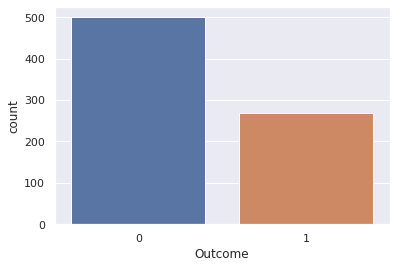

In [ ]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = data)

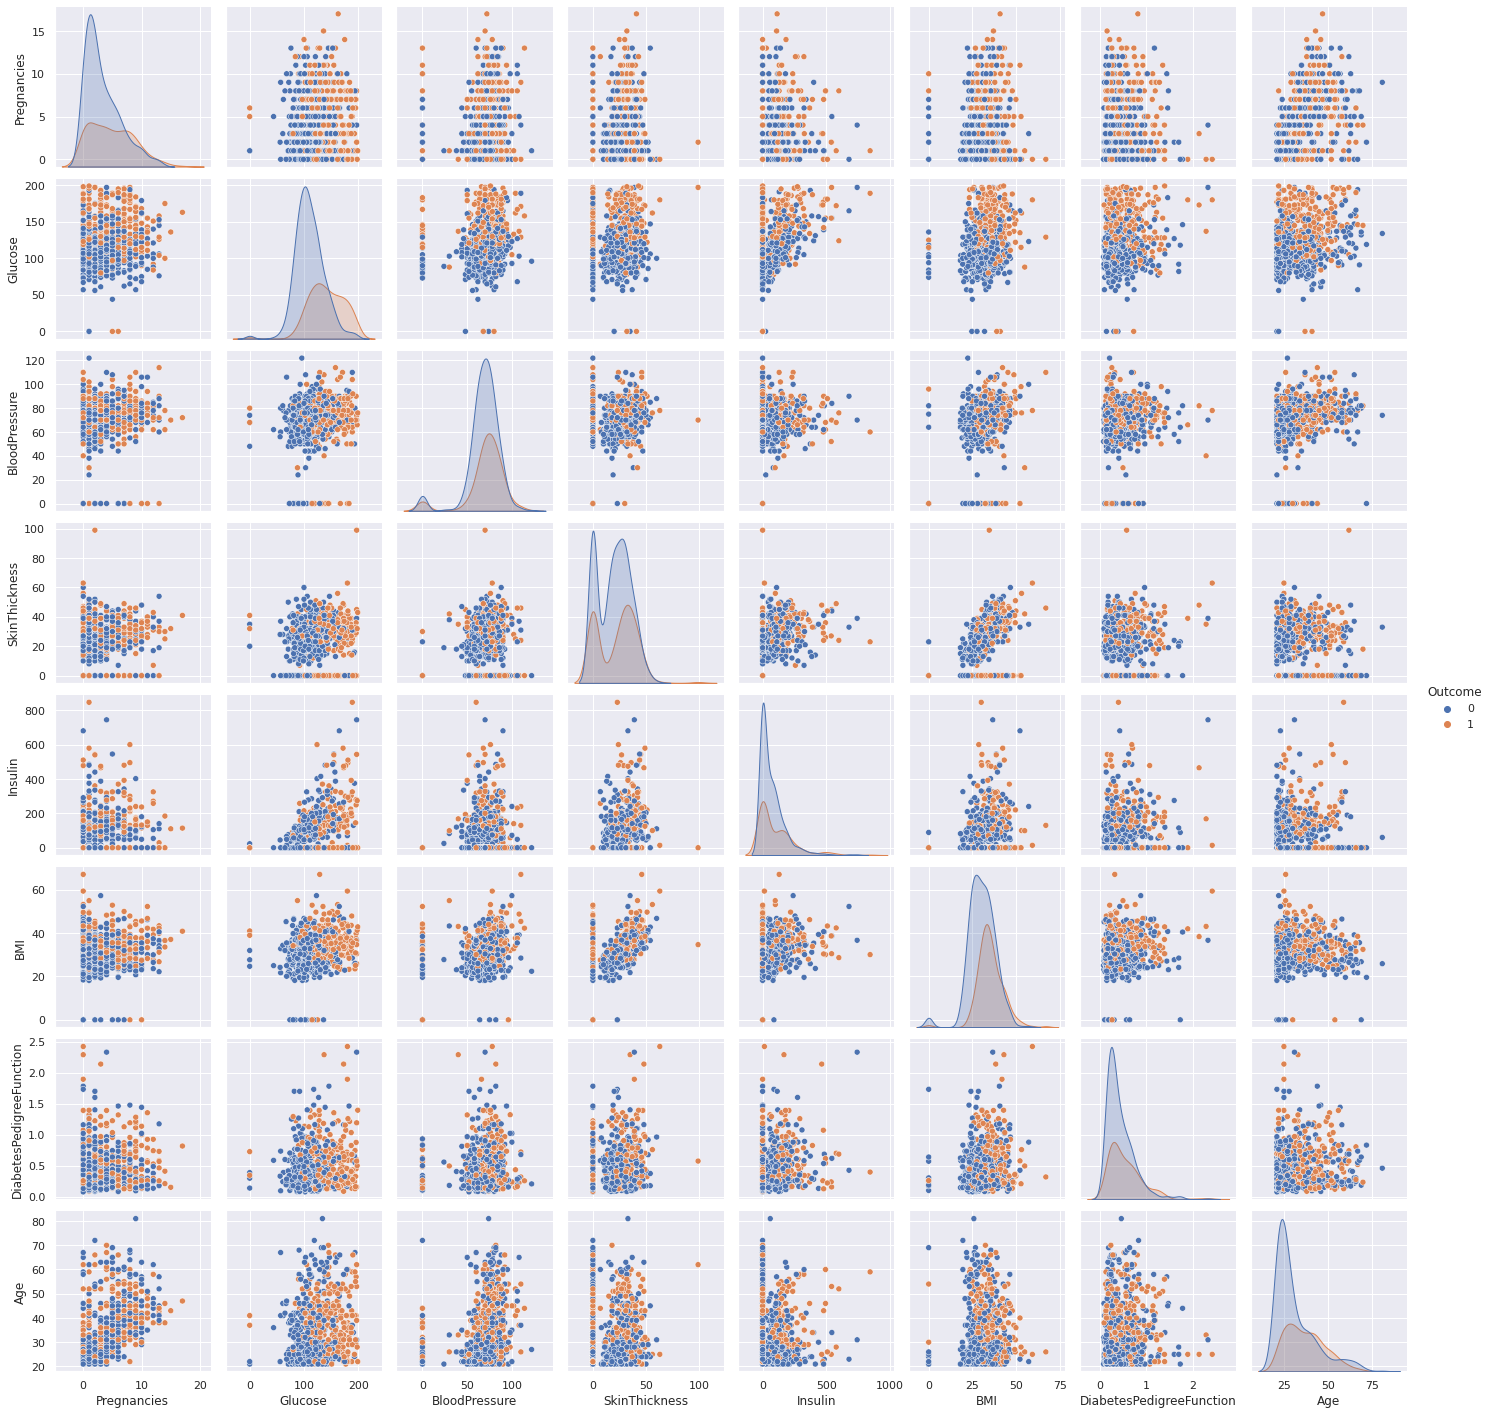

In [ ]:
# Pairplot 
sns.pairplot(data = data, hue = 'Outcome')
plt.show()

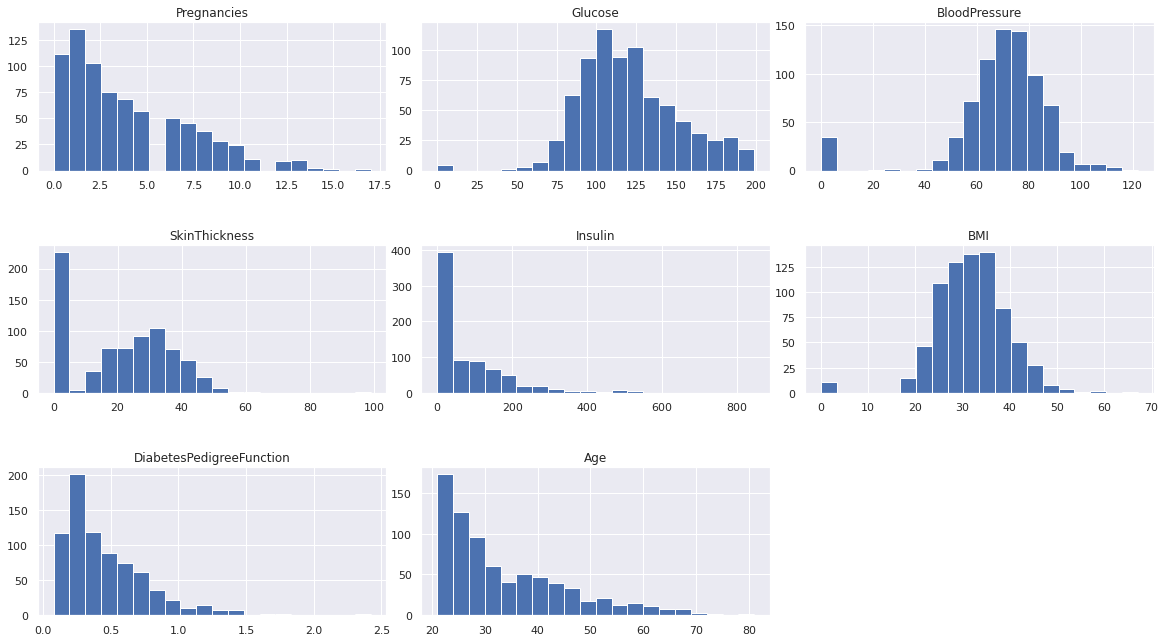

In [ ]:
# Histogram of each feature
import itertools

col = data.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    data[i].hist(bins = 20)
    plt.title(i)
plt.show()

#To check the distribution of data so that we can understand the how data is spread out and the missing values etc


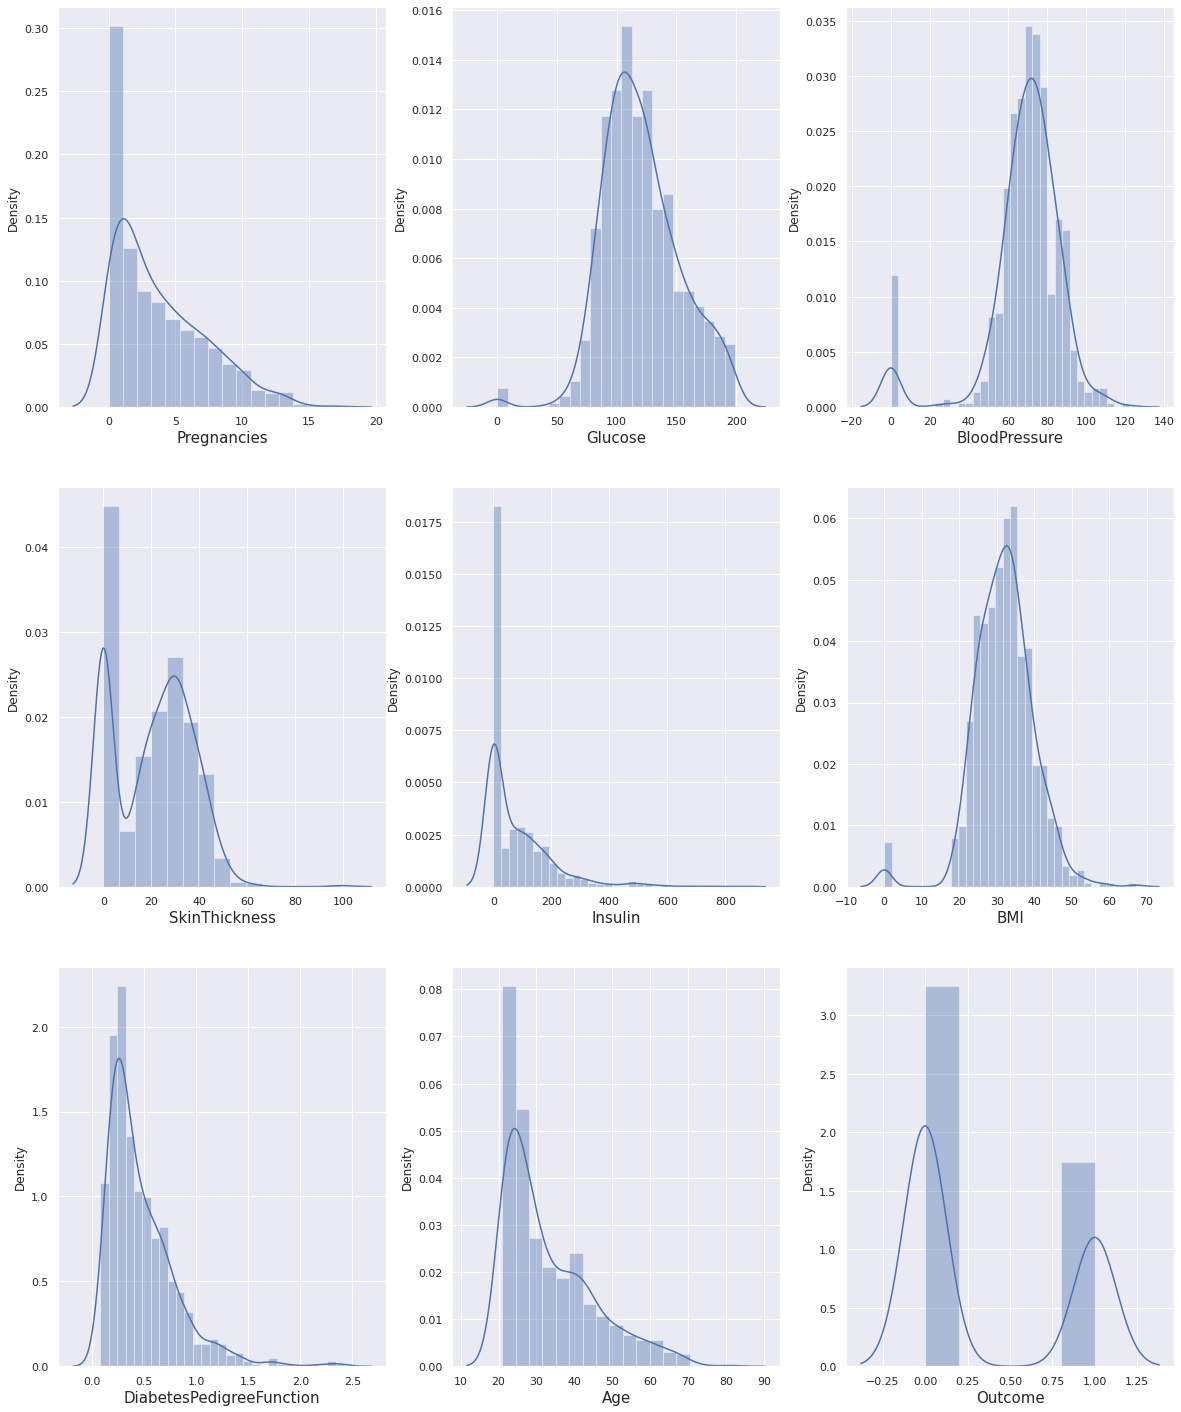

In [ ]:
# DATA DISTRIBUTION OF EACH COLUMN

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

In [ ]:
# replacing zero values with the mean of the columnn

data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

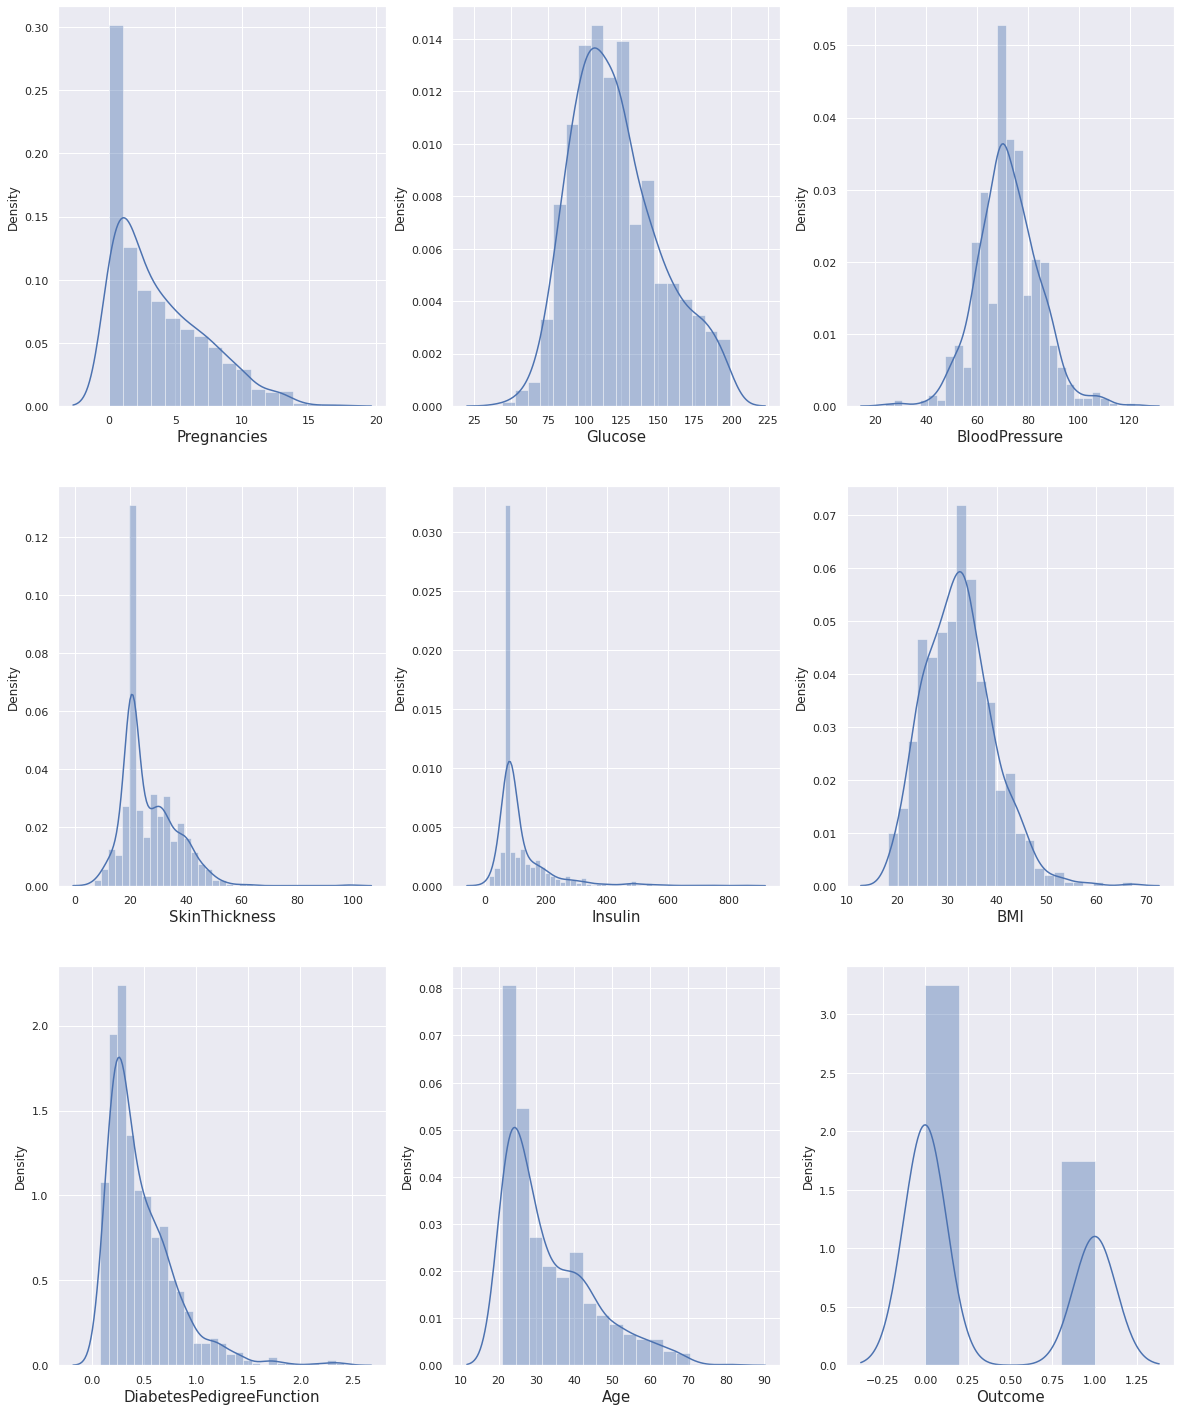

In [ ]:
# again checking the data distribution

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

#Now we will remove the outliers from our data set

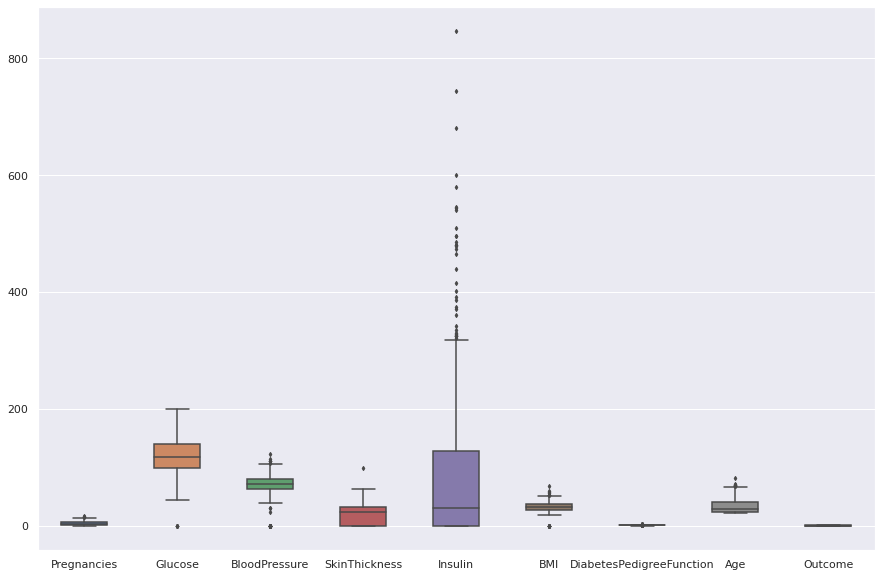

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [ ]:
outlier = data['Pregnancies'].quantile(0.98)
# removing the top 2% data from the pregnancies column
data = data[data['Pregnancies']<outlier]

outlier = data['BMI'].quantile(0.99)
# removing the top 1% data from BMI column
data = data[data['BMI']<outlier]

outlier = data['SkinThickness'].quantile(0.99)
# removing the top 1% data from SkinThickness column
data = data[data['SkinThickness']<outlier]

outlier = data['Insulin'].quantile(0.95)
# removing the top 5% data from Insulin column
data = data[data['Insulin']<outlier]

outlier = data['DiabetesPedigreeFunction'].quantile(0.99)
# removing the top 1% data from DiabetesPedigreeFunction column
data = data[data['DiabetesPedigreeFunction']<outlier]

outlier = data['Age'].quantile(0.99)
# removing the top 1% data from Age column
data = data[data['Age']<outlier]

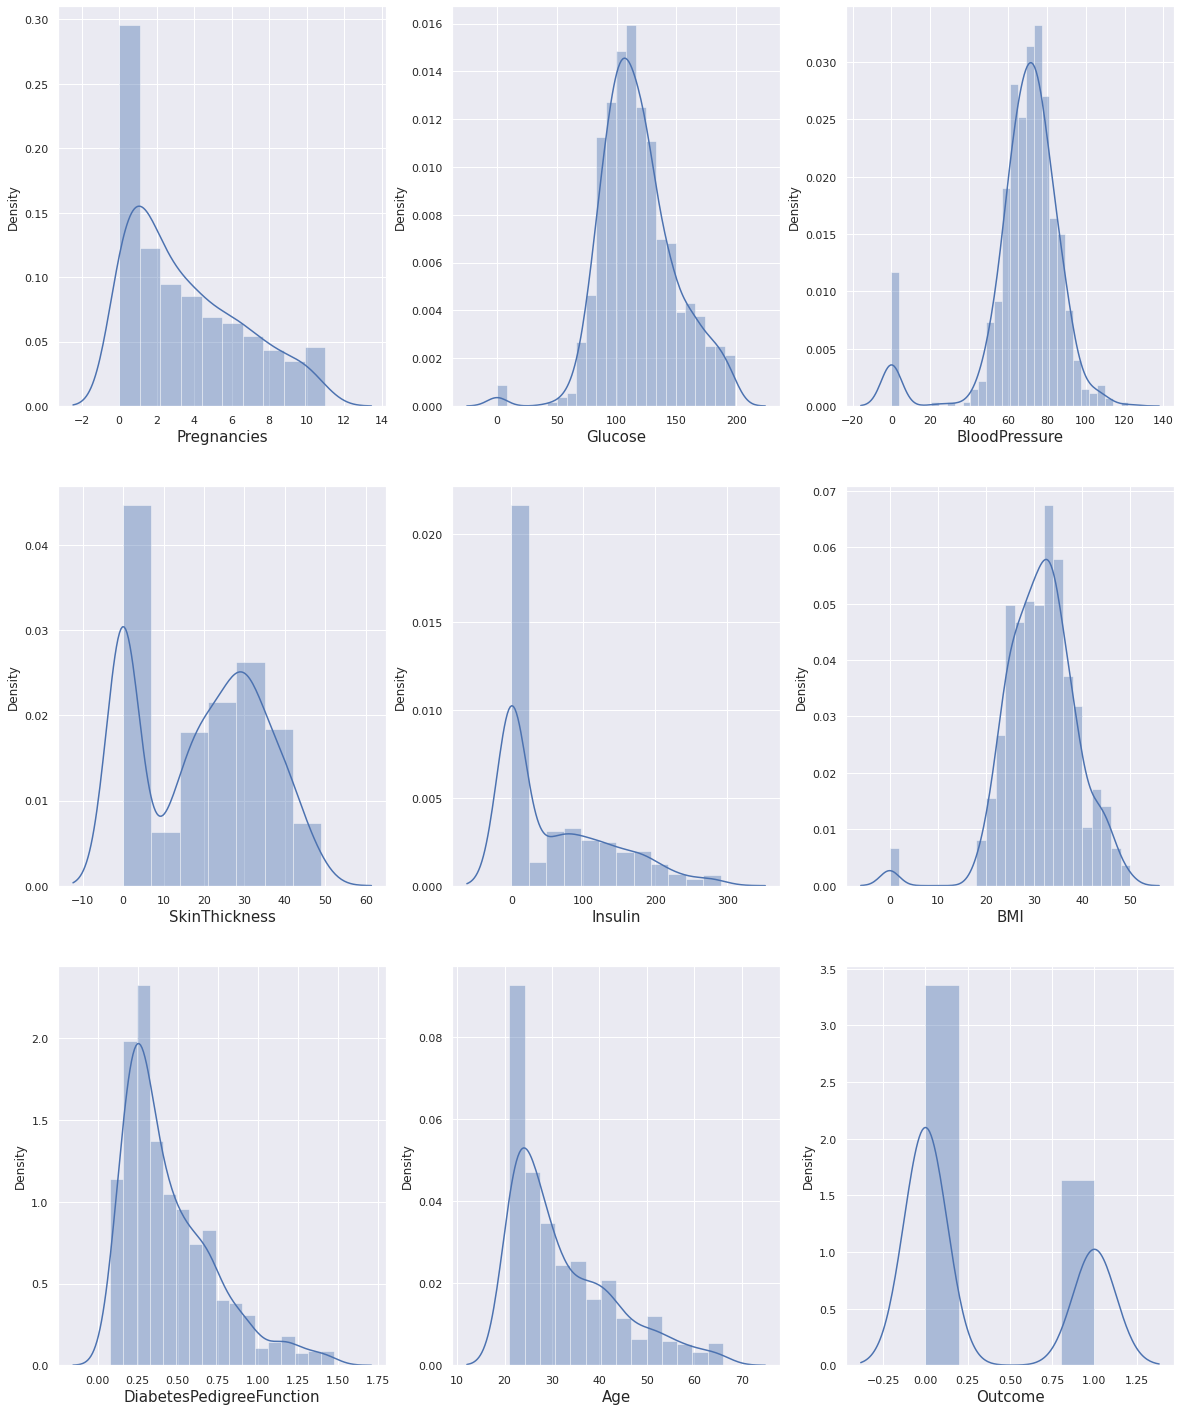

In [ ]:
# again checking the data distribution

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

#Now we have completed the data exploration and analysis, we can start training the models

In [ ]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [ ]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# scaling the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# fitting data to model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.7881188118811882
Test Accuracy of Logistic Regression Model is 0.7692307692307693


In [ ]:
# confusion matrix 

confusion_matrix(y_test, y_pred)

array([[106,  11],
       [ 27,  25]])

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       117
           1       0.69      0.48      0.57        52

    accuracy                           0.78       169
   macro avg       0.75      0.69      0.71       169
weighted avg       0.77      0.78      0.76       169



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 0.8376237623762376
Test Accuracy of KNN Model is 0.7514792899408284


In [ ]:
# confusion matrix 

confusion_matrix(y_test, y_pred)

array([[103,  14],
       [ 28,  24]])

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       117
           1       0.63      0.46      0.53        52

    accuracy                           0.75       169
   macro avg       0.71      0.67      0.68       169
weighted avg       0.74      0.75      0.74       169



In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.8534653465346534
Test Accuracy of SVC Model is 0.7633136094674556


In [ ]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[101,  16],
       [ 24,  28]])

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       117
           1       0.64      0.54      0.58        52

    accuracy                           0.76       169
   macro avg       0.72      0.70      0.71       169
weighted avg       0.76      0.76      0.76       169



#To now make our existing models better, we will tune the hyper parameters

In [ ]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [ ]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 8}
0.7683168316831683


In [ ]:
dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decesion Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decesion Tree Model is {dtc_test_acc}")

Training Accuracy of Decesion Tree Model is 0.80990099009901
Test Accuracy of Decesion Tree Model is 0.7041420118343196


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       117
           1       0.52      0.65      0.58        52

    accuracy                           0.70       169
   macro avg       0.67      0.69      0.67       169
weighted avg       0.73      0.70      0.71       169



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.8178217821782178
Test Accuracy of Random Forest Model is 0.7692307692307693


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       117
           1       0.72      0.40      0.52        52

    accuracy                           0.77       169
   macro avg       0.75      0.67      0.68       169
weighted avg       0.76      0.77      0.75       169



#Now we will perform stacking, for stacking here we have used Logistic regression and SVM , and then used the learnings from those and feed them into another classifier named randomforest

In [ ]:
# stacking the ML model
from sklearn.model_selection import train_test_split

train, val_train, test, val_test = train_test_split(X, y, test_size = 0.5, random_state = 355)

In [ ]:
# let's split the training set again into training and test dataset

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 355)

In [ ]:
# using Logistic Regression and SVM algorithm as base models.
# Let's fit both of the models first on the X_train and y_train data.

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
predict_val1 = lr.predict(val_train)
predict_val2 = svm.predict(val_train)

In [ ]:
predict_val = np.column_stack((predict_val1, predict_val2))

In [ ]:
predict_test1 = lr.predict(X_test)
predict_test2 = svm.predict(X_test)

In [ ]:
predict_test = np.column_stack((predict_test1, predict_test2))

In [ ]:
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val, val_test)

RandomForestClassifier()

In [ ]:
stacking_acc = accuracy_score(y_test, rand_clf.predict(predict_test))
print(stacking_acc)

0.8235294117647058


In [ ]:
# confusion matrix

confusion_matrix(y_test, rand_clf.predict(predict_test))

array([[43,  5],
       [ 7, 13]])

In [ ]:
# classification report

print(classification_report(y_test, rand_clf.predict(predict_test)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        48
           1       0.72      0.65      0.68        20

    accuracy                           0.82        68
   macro avg       0.79      0.77      0.78        68
weighted avg       0.82      0.82      0.82        68

